# (7A) Social networks

For this notebook, you'll need to install networkx. In terminal, type:

    pip install networkx
    pip install pyvis

In [178]:
import json
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction to networks

### History

Network theory has a famous beginning in a 1736 solution to a mathematical problem called the [Seven Bridges of Königsberg](https://en.wikipedia.org/wiki/Seven_Bridges_of_K%C3%B6nigsberg). The problem: is it possible to cross each of the seven bridges in the city of Königsberg only once?

<center><img src="Konigsberg_bridges.png" /></center>

A mathematician named [Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler) proved in 1736 that the problem has no solution (it is not possible to cross each bridge only once). His solution laid the foundations of graph theory, because he discovered that the actual map and geographic space is irrelevant, and all we need to think about are nodes and edges.

<center><img src="konigsberg_to_network.png" /></center>

The seven bridges become seven "edges" between "nodes", and we can then demonstrate mathematically that there is no way to move through the network without crossing the same edge twice.

### Sample graph

In [179]:
# Get a sample graph
g_karate = nx.karate_club_graph()

From the [source](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm#zachary): 

<blockquote>
BACKGROUND

These are data collected from the members of a university karate club by Wayne Zachary. The ZACHE matrix represents the presence or absence of ties among the members of the club; the ZACHC matrix indicates the relative strength of the associations (number of situations in and outside the club in which interactions occurred).

Zachary (1977) used these data and an information flow model of network conflict resolution to explain the split-up of this group following disputes among the members.

REFERENCE

Zachary W. (1977). An information flow model for conflict and fission in small groups. Journal of Anthropological Research, 33, 452-473.
</blockquote>

In [180]:
# Draw graph
def draw_graph(g):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8));
    nx.draw(g, ax=ax)

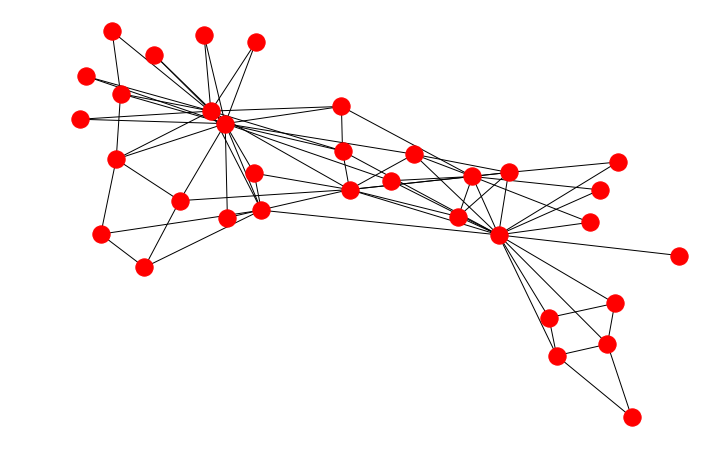

In [181]:
draw_graph(g_karate)

In [182]:
def draw_graph2(g):
    from pyvis import network as net
    G = net.Network(notebook=True)
    G.from_nx(g)
    G.show_buttons()
    #G.barnes_hut(overlap=5)
    G.force_atlas_2based(overlap=5)
    return G.show('graph.html')

In [183]:
draw_graph2(g_karate)

In [20]:
# Get the nodes
g_karate.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [21]:
# Get the edges
g_karate.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

### Network measures

#### Network degree

How many other nodes are connected to any given node? This number is called its "degree."

In [185]:
# Get a dictionary from the node --> its "degree"
degree_dict = dict(g_karate.degree)
print(degree_dict)

{0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17}


In [184]:
# Quick helper function to show a dictionary sorted by its value
def sort_dict(d,ascending=False):
    # convert the dictionary to a pandas "series" (effectively a dataframe column divorced from a dataframe)
    series = pd.Series(d)
    # return this series, sorted
    return series.sort_values(ascending=ascending)

In [10]:
# Which nodes have the most "ties"?
sort_dict(degree_dict)

33    17
0     16
32    12
2     10
1      9
31     6
3      6
23     5
13     5
8      5
27     4
5      4
6      4
29     4
30     4
7      4
25     3
24     3
28     3
10     3
4      3
19     3
9      2
15     2
12     2
14     2
17     2
18     2
20     2
21     2
22     2
26     2
16     2
11     1
dtype: int64

#### Network centrality

In [30]:
# This is the same data except normalized by the total number of edges
degree_centrality = nx.degree_centrality(g_karate)

# Show
sort_dict(degree_centrality)

33    0.515152
0     0.484848
32    0.363636
2     0.303030
1     0.272727
31    0.181818
3     0.181818
23    0.151515
13    0.151515
8     0.151515
27    0.121212
5     0.121212
6     0.121212
29    0.121212
30    0.121212
7     0.121212
25    0.090909
24    0.090909
28    0.090909
10    0.090909
4     0.090909
19    0.090909
9     0.060606
15    0.060606
12    0.060606
14    0.060606
17    0.060606
18    0.060606
20    0.060606
21    0.060606
22    0.060606
26    0.060606
16    0.060606
11    0.030303
dtype: float64

#### Betweeenness centrality

In [24]:
betweenness_centrality = nx.betweenness_centrality(g_karate)
sort_dict(betweenness_centrality)

0     0.437635
33    0.304075
32    0.145247
2     0.143657
31    0.138276
8     0.055927
1     0.053937
13    0.045863
19    0.032475
5     0.029987
6     0.029987
27    0.022333
23    0.017614
30    0.014412
3     0.011909
25    0.003840
29    0.002922
24    0.002210
28    0.001795
9     0.000848
4     0.000631
10    0.000631
7     0.000000
15    0.000000
11    0.000000
12    0.000000
14    0.000000
17    0.000000
18    0.000000
20    0.000000
21    0.000000
22    0.000000
26    0.000000
16    0.000000
dtype: float64

### Filtering graphs

In [186]:
def filter_graph_by_degree(g,min_degree = 2):
    # make an empty list which will store all the nodes we want to remove
    copy = g
    nodes_to_remove = []
    
    # get the dictionary of node->degree
    degree_dict=dict(copy.degree)
    
    # loop over the nodes
    for node in copy.nodes():
        degree = degree_dict.get(node,0)
        if degree < min_degree:
            nodes_to_remove.append(node)
            
    # remove from network
    copy.remove_nodes_from(nodes_to_remove)
    
    return copy

In [187]:
g=filter_graph_by_degree(g,2)

In [37]:
draw_graph(g)

NameError: name 'g' is not defined

## Making networks from metadata

In [25]:
# Here's a function to bring a google spreadsheet into a Pandas dataframe
def google2df(url):
    from io import BytesIO
    import requests
    r = requests.get(url)
    data = r.content
    df = pd.read_csv(BytesIO(data))
    return df.fillna('')

In [26]:
# Corpus metadata for Tropic of Orange
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSwmeht7zqyfnQ_Z4LuDTDf4Zr_Ny38jfy0sYmRG4L6oxgH4MynYnhcnFzXq0yMMgPQ8TkuYsKm0Q0Q/pub?gid=0&single=true&output=csv'

In [12]:
df = google2df(url)
df

,fn,part,part_day,part_title,chapter,chapter_title,setting,lat,long,narrator,dialogue,characters mentioned,who talks to whom,characters appear irl?,plants,foods,animals,manmade objects,famous people,cities / countries
0,ch01.txt,1,Monday,Summer Solstice,1,Midday,Not Too Far From Mazatlán,,,Rafaela Cortes,y,"Rafaela, Sol, Doña Maria, Gabriel, Bobby, Pepe","Rafaela <> Dona Maria, Rafaela <> Gabriel","Rafaela, Sol, Doña Maria","cactus, pepper, herb, sunflower, rose, banana,...",orange,"moth, spider, lizard, beetle, iguana, crab, mo...",,,"Mazatlan, Mexico, Los Angeles, Culiacan, Calif..."
1,ch02.txt,1,Monday,Summer Solstice,2,Benefits,Koreatown,,,Bobby Ngu,n,"Bobby, Rafaela",,Bobby,"Ginseng, palm trees","donut, ginseng",,,,"Vietnam, Korea, China, Japan, Peru, Mexico, Si..."
2,ch03.txt,1,Monday,Summer Solstice,3,Weather Report,Westside,,,Emi,y,"Emi, Gabriel",Emi <> Gabriel,"Emi, Gabriel","Lime, Fungi, Mushroom, Rosemary, Celery","Lime, Fungi, Mushroom, Rosemary, Celery, Sauvi...",,,,
3,ch04.txt,1,Monday,Summer Solstice,4,Station ID,Jefferson & Normandie,,,Buzzworm,y,,,,"Palm trees (Washingtonia robusta (""Mexican Fan...",,,,,
4,ch05.txt,1,Monday,Summer Solstice,5,Traffic Window,Harbor Freeway,,,Manzanar Murakami,n,,,Manzanar Murakami,,,,"Mazdas, Tercels, Corollas, Accords, Tauruses, ...",,
5,ch06.txt,1,Monday,Summer Solstice,6,Coffee Break,Downtown,,,Gabriel Balboa,y,"Gabriel, Emi, Terry, Rafaela, Bobby (no name),...",Gabriel <> Emi,,,"bread, leftover fries",,,"leonard bernstein, esa-pekka salonen, seiji ozawa",
6,ch07.txt,1,Monday,Summer Solstice,7,To Wake,The Marketplace,,,Arcangel,n,Arcangel,,Arcangel,"bamboo, birch, oak, pine, sequoia, cactus",,,,,
7,ch08.txt,2,Tuesday,Diamond Lane,8,Rideshare,Downtown Interchange,,,Manzanar Murakami,,,,,,,,,,
8,ch09.txt,2,Tuesday,Diamond Lane,9,NewsNow,Hollywood South,,,Emi,,,,,,,,,,
9,ch10.txt,2,Tuesday,Diamond Lane,10,Morning,En México,,,Rafaela Cortes,,,,,,,,,,


In [39]:
# Get this column
df['who talks to whom']

0     Rafaela <> Dona Maria, Rafaela <> Gabriel
1                                              
2                                Emi <> Gabriel
3                                              
4                                              
5                                Gabriel <> Emi
6                                              
7                                              
8                                              
9                                              
10                                             
11                                             
12                                             
13                                             
14                                             
15                                             
16                                             
17                                             
18                                             
19                                             
20                                      

In [41]:
# new graph
G_tropic_meta=nx.Graph()

# for each entry in this column
for entry in df['who talks to whom']:
    
    # for each comma
    for edge_str in entry.split(','):
        
        # split between characters
        chars = edge_str.split('<>')
        
        # if there are two things in between a "<>"
        if len(chars)==2:
            # get two chars
            char1 = chars[0].strip()
            char2 = chars[1].strip()
            
            # add edge between characters
            if not G_tropic_meta.has_edge(char1,char2):
                G_tropic_meta.add_edge(char1,char2,weight=1)
            else:
                G_tropic_meta[char1][char2]['weight']+=1

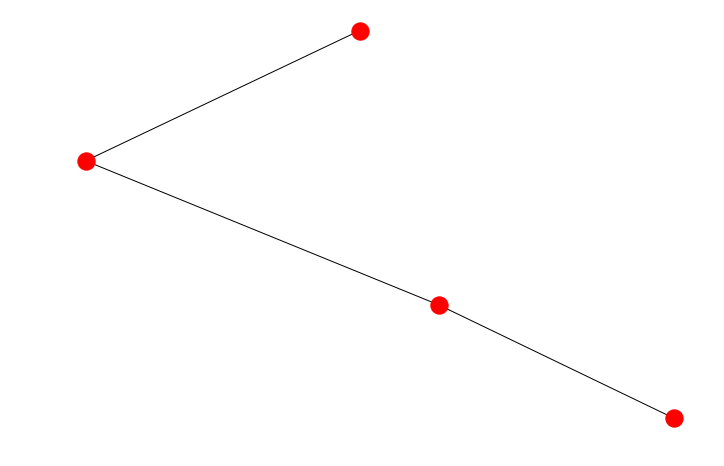

In [42]:
# Draw this graph
draw_graph(G_tropic_meta)

## Making networks from NER

Let's make a network of the characters in Harry Potter.

In [49]:
def ner_spacy(string):
    """
    Using spacy, this function takes any string, identifies the named entities in it,
    and returns a list of dictionaries, with one dictionary per named entitiy,
    where each dictionary looks like this:
    
    {
        'type': 'PERSON',
        'entity': 'Ryan',
        '_sent_num': 1,
        '_sent': 'Ryan Heuser cannot wait until he graduates from Stanford University.'
    }
    """
    
    try:
        # import spacy
        import spacy
    except ImportError:
        print("spacy not installed. Please follow directions above.")
        return

    # clean string
    string = string.strip().replace('\n',' ').replace("’","'").replace("‘","'")
    
    # load its default English model
    nlp = spacy.load("en_core_web_sm")

    # create a spacy text object
    doc = nlp(string)
    
    # make an output list
    output_list = []

    # loop over sentences
    sent_num=0
    for sent in doc.sents:
        sent_num+=1
        added_sent_already = False

        # loop over sentence's entities
        sent_doc = nlp(str(sent))
        for ent in sent_doc.ents:
            
            # make a result dict
            result_dict = {}
            
            # set sentence number
            result_dict['_sent_num'] = sent_num
            
            # store text too
            if not added_sent_already:
                result_dict['_sent'] = sent.text
                added_sent_already = True
            else:
                result_dict['_sent'] = ''
            
            # get type
            result_dict['type'] = ent.label_
            
            # get entity
            result_dict['entity'] = ent.text
            
            # get start char
            result_dict['start_char'] = ent.start_char
            
            # get end char
            result_dict['end_char'] = ent.end_char
            
            # add result_dict to output_list
            output_list.append(result_dict)
            
    # return output
    return output_list


In [51]:
# set the path
text_path = '../corpora/harry_potter/texts/Sorcerers Stone.txt'
text_path = '../corpora/tropic_of_orange/texts/ch01.txt'

limit_paragraphs = 100
#limit_paragraphs = None   # uncomment this to do whole text

# open the file
with open(text_path) as file:
    txt=file.read()

# make an empty network
G = nx.Graph()
    
# loop over the paragraphs!
paragraphs = txt.split('\n\n')

# randomize?
import random
random.shuffle(paragraphs)

# limit paragraphs?
paragraphs = paragraphs[:limit_paragraphs]

para_num=0
for para in paragraphs:
    para_num+=1
    if not para_num%10:
        print(para_num,len(paragraphs))
    
    # get the people for this paragraph
    people_in_this_para = []
    
    # get the NER results for this paragraph
    ner_results_ld = ner_spacy(para)
    
    # for each result
    for result_dict in ner_results_ld:
        # if it's a person:
        if result_dict['type']=='PERSON':
            # get the person's name
            person=result_dict['entity'].strip()
            
            # Let's do only first names
            if ' ' not in person:
                # add the person to the list
                people_in_this_para.append(person)
    
    ## get the unique pairs of persons in this paragraph
    # for each person1 in the paragraph
    for person1 in people_in_this_para:
        # for each person2 in the paragraph
        for person2 in people_in_this_para:
            # skip if we've repeated this already
            if person1>=person2: continue
            
            
            if not G.has_edge(person1,person2):
                G.add_edge(person1,person2,weight=1)
            else:
                G[person1][person2]['weight']+=1

10 54
20 54
30 54
40 54
50 54


In [54]:
G_hp=filter_graph_by_degree(G,2)

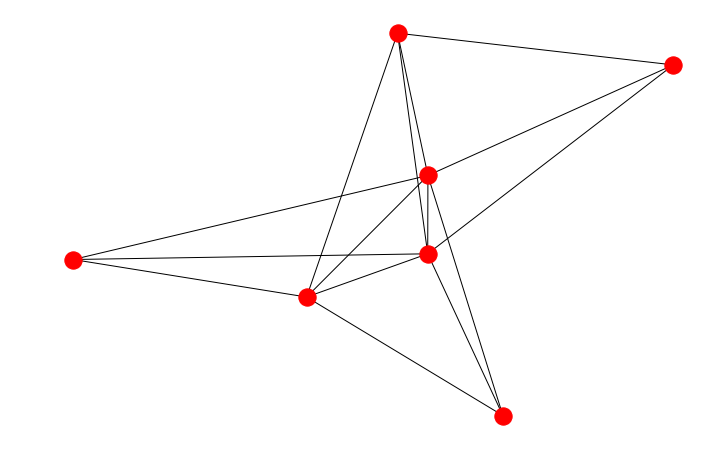

In [55]:
draw_graph(G_hp)

## Saving networks

### Graphml (good for Gephi)

Try downloading [Gephi](https://gephi.org/) and loading your graphml file for visualization.

In [ ]:
# Save as Graphml (good for Gephi)
nx.write_graphml(G, 'data.network.graphml')

### Edgelist (good for Palladio)

Try visualizing this in [Palladio](http://hdlab.stanford.edu/palladio-app).

In [ ]:
# Save as edgelist

def make_edge_table(g):
    results=[]
    for node1,node2,edge_data in g.edges(data=True):
        
        edge_data['source'] = node1
        edge_data['target'] = node2
        
        results.append(edge_data)
    
    return pd.DataFrame(results)

In [ ]:
edge_df = make_edge_table(G)
edge_df

In [ ]:
edge_df.to_csv('data.network.edges.csv',index=False)

## For network research team

* Generate a network from our metadata:
    * Divide up chapters among some people and annotate who speaks to whom [in our metadata spreadsheet](https://docs.google.com/spreadsheets/d/1cRmrwQmq2HuA-cb_mQYGGau40AO9fAROqRUK4EKKoJ4/edit?usp=sharing).
    * Generate the network from the metadata
    * Who is the most central character? Who is the most betweenness-central character?
    * Save the network
    * Visualize it in Palladio or Gephi


* Generate a network from NER:
    * Look at the code above, but adapt it to work for the whole novel
    * Visualize it in Gephi or Palladio    


* Generate networks by narrator:
    * Using either metadata or NER, which narrators' chapters create the most dense social networks? Which the most sparse? 
    
    
* (Advanced) Generate a network for other words
    * Maybe try this for place names also? Or for people AND placenames together?
    * Fruit? Plants? Commodities?


* Your own initiatives using networks and *Tropic of Orange*

In [190]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
import pyvis
from pyvis.network import Network

stop_words = stopwords.words('english')
G = Network()
colordict = {}
colordict['N'] = '#ff0000'
colordict['V'] = '#84c5d0'
colordict['A'] = '#ebc542'
with open('../corpora/tropic_of_orange/texts/ch01.txt') as file:
    string_ch01 = file.read().lower()

    word_stripped = tokenizer.tokenize(string_ch01)
    nohyphens = []
    for word in word_stripped:
        if('—' in word):
            wi = word.split('-')
            wi.remove('-')
            nohyphens.append(w for w in wi)
        else:
            nohyphens.append(word)
    word_stripped = nohyphens
    tags = nltk.pos_tag(word_stripped)
    part_dict = {}
    for tag in tags:
        part_dict[tag[0]] = tag[1]
    #print(word_stripped)
    words = list(word_stripped)
    ws = [w for w in words if w not in stop_words ]
    bigs = nltk.bigrams(ws)
   
    colorkeys= []
    for pair in bigs:
        #print(pair)
        p0 = part_dict[pair[0]][:1]
        p1 = part_dict[pair[1]][:1]
        
        if p0 in colordict.keys() and p1 in colordict.keys():
            G.add_node(pair[0],colordict[p0])
            G.add_node(pair[1],colordict[p1])
            G.add_edge(pair[0], pair[1])

G.show("mygraph.html")
#G.show_buttons()
#G.barnes_hut(overlap=5)
#G.force_atlas_2based(overlap=5)
#G.show('graph.html')


def convert_to_hex(rgba_color) :
    red = int(rgba_color[0]*255)
    green = int(rgba_color[1]*255)
    blue = int(rgba_color[2]*255)
    return '#%02x%02x%02x' % (red, green, blue)

draw_graph2(G)

AssertionError: 